# Learn2Learn Prototypical Network Implementation for BRACOL Dataset


***Install learn2learn and EfficientNet***

In [ ]:
!pip install learn2learn
!pip install efficientnet_pytorch

from IPython.display import clear_output 
clear_output()
print('Done!')

Done!


***Some imports***

In [ ]:
import sys
# change this to your own protonet files dir
sys.path.insert(0, '/content/drive/MyDrive/pg/protonet/')

from models import *
from engine import create_task_pool, run_train_dataloader, run_test_dataloader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

### Training on Dataset

***Define some hiperparams***

In [ ]:
# tasks params
ways = 5
shot = 1

# model & optimizer & lr_scheduler
model = MobileNetv2()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# path to data
path_data = '/content/drive/MyDrive/pg/dataset/'

# dataset transforms
train_transforms=transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(0.5),
            transforms.RandomVerticalFlip(0.5),
            transforms.RandomApply([transforms.RandomRotation(10)], 0.25),
            transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

val_transforms=transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

***Define train dataset, validation dataset and task pool***

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root=path_data + 'train/', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = torchvision.datasets.ImageFolder(root=path_data + 'val/', transform=val_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

# it might take a while to define the task pool
task_pool = create_task_pool(dataset=train_dataset, num_tasks=-1, ways=5, shot=1)

***Run training***

In [ ]:
run_train_dataloader(n_epochs=100, 
                     train_loader=train_loader, 
                     val_loader=val_loader, 
                     task_pool=task_pool, 
                     model=model,
                     optimizer=optimizer, 
                     lr_scheduler=lr_scheduler, 
                     ways=ways, 
                     shot=shot, 
                     save_path='model_final.pth')

(Train) Epoch 1/100: loss=1.4275 acc=0.6622
(Validation) Epoch 1/100: loss=1.2601 acc=0.7968
Estimated epoch time: 20.004841327667236s 

ETA: 33.00798819065094min 

(Train) Epoch 2/100: loss=1.1092 acc=0.8323
(Validation) Epoch 2/100: loss=0.9678 acc=0.9046
Estimated epoch time: 19.74624800682068s 

ETA: 32.25220507780711min 

(Train) Epoch 3/100: loss=0.9193 acc=0.8683
(Validation) Epoch 3/100: loss=0.8638 acc=0.9105
Estimated epoch time: 19.803017616271973s 

ETA: 32.01487847963969min 

(Train) Epoch 4/100: loss=0.8228 acc=0.8877
(Validation) Epoch 4/100: loss=0.7513 acc=0.9256
Estimated epoch time: 19.76768159866333s 

ETA: 31.628290557861327min 

(Train) Epoch 5/100: loss=0.7414 acc=0.9141
(Validation) Epoch 5/100: loss=0.6919 acc=0.9611
Estimated epoch time: 19.828974962234497s 

ETA: 31.395877023537953min 

(Train) Epoch 6/100: loss=0.6869 acc=0.9302
(Validation) Epoch 6/100: loss=0.6249 acc=0.9730
Estimated epoch time: 19.84249973297119s 

ETA: 31.0865829149882min 

(Train) Epoc

0.3253036697705587

### Inference on Dataset

***Define the model and weights***

In [ ]:
# tasks params
ways = 5
shot = 1
path_data = '/content/drive/MyDrive/pg/dataset/'


# define model
model = MobileNetv2()
model.load_state_dict(torch.load('model_final.pth'))
model.eval()

MobileNetv2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

***Define test dataset***

In [ ]:
trans = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
test_dataset = torchvision.datasets.ImageFolder(root=path_data + 'test/', transform=trans)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)


# it might take a while to define the task pool
train_dataset = torchvision.datasets.ImageFolder(root=path_data + 'train/', transform=trans)
task_pool = create_task_pool(dataset=train_dataset, num_tasks=-1, ways=ways, shot=shot)

***Run inference on test dataset***

In [ ]:
results_dict = run_test_dataloader(model=model, 
                    test_loader=test_loader, 
                    task_pool=task_pool, 
                    ways=ways, 
                    shot=shot)

Batch 1/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 2/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 3/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 4/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 5/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 6/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 7/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 8/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 9/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 10/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 11/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 12/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 13/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 14/335: Batch Accuracy = 100.00 / Total Accuracy = 100.00
Batch 15/335: Batch Accuracy = 0.00 / Total Accuracy = 93.33
Batch 16/335: Batch Accuracy = 100.00 / Total Accura

***Plot confusion matrix***

0.9689928145171113
0.9707186637391377
0.9698077412447681


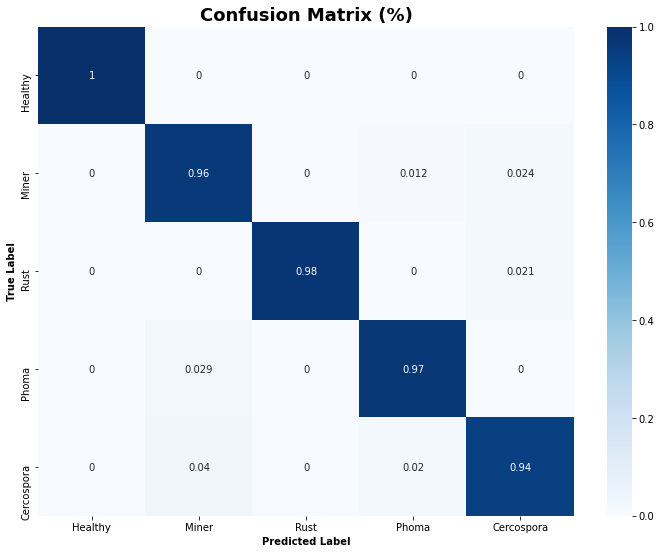

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

y_true = results_dict['real']
y_pred = results_dict['predicted']

cm = confusion_matrix(results_dict['real'], results_dict['predicted'], normalize='true')
df_cm = pd.DataFrame(cm, index = [i for i in ['Healthy', 'Miner', 'Rust', 'Phoma', 'Cercospora']],
                  columns = [i for i in ['Healthy', 'Miner', 'Rust', 'Phoma', 'Cercospora']])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
print(precision_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='macro'))

### Run training script for multiple backbones

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/pg/protonet')
from run_protonet_models import run_protonet_models

run_protonet_models(ways=5, shot=1, path_data='/content/drive/MyDrive/pg/dataset/')

***Plot t-SNE***

Loaded pretrained weights for efficientnet-b4


335it [00:03, 90.60it/s]
335it [00:03, 99.13it/s]
335it [00:04, 74.41it/s]
335it [00:06, 52.55it/s]
335it [00:08, 39.01it/s]


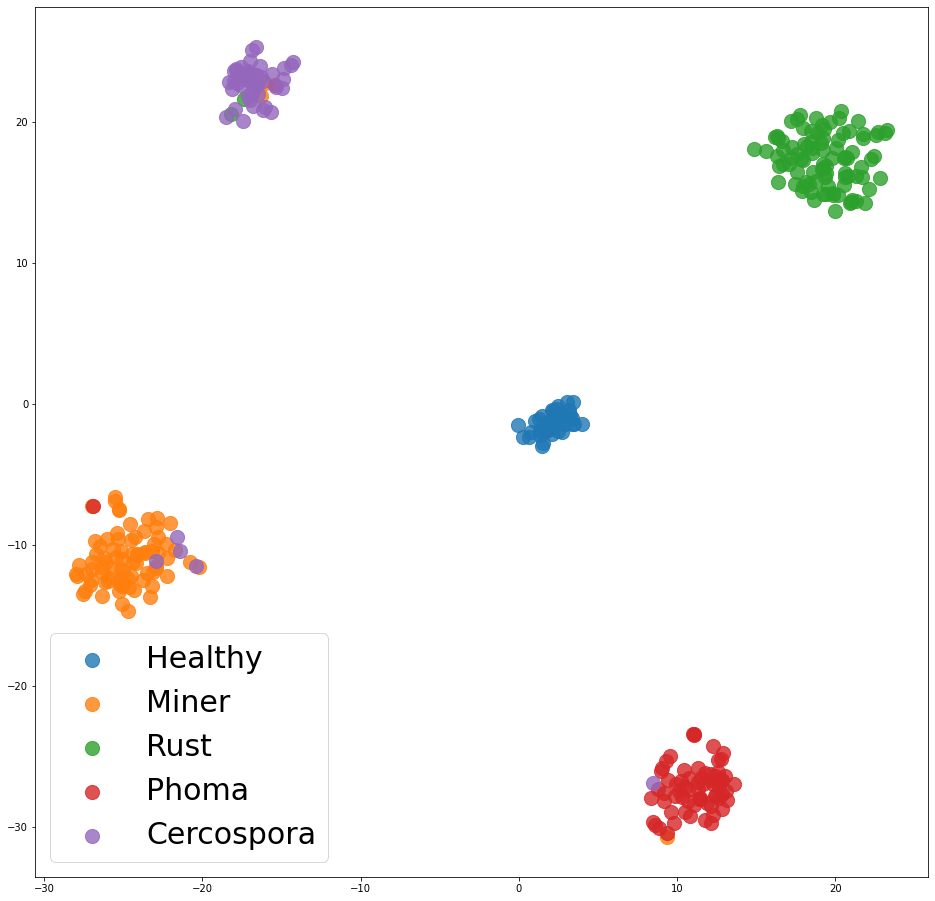

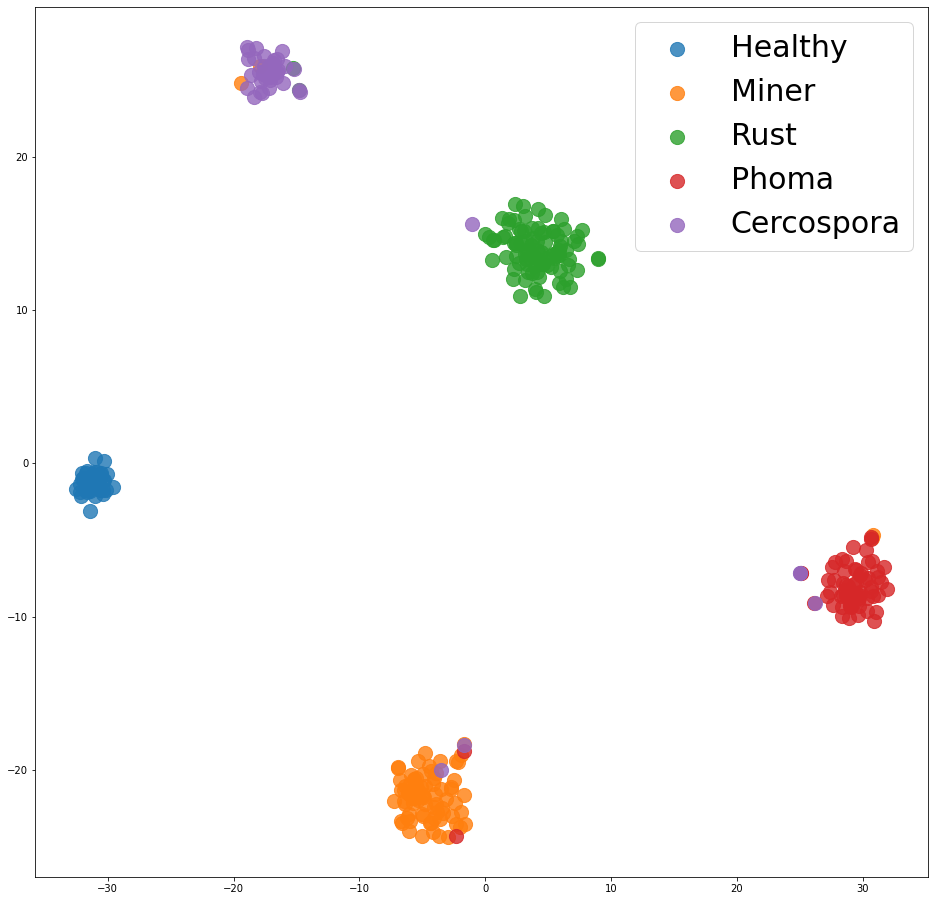

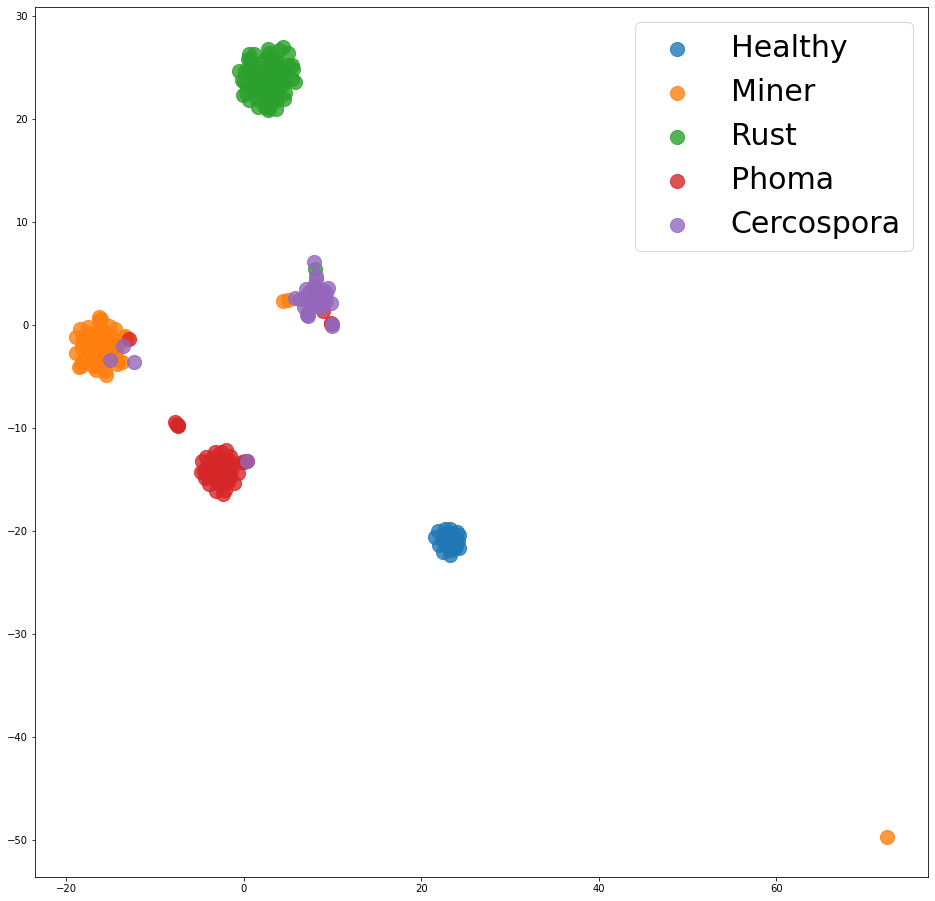

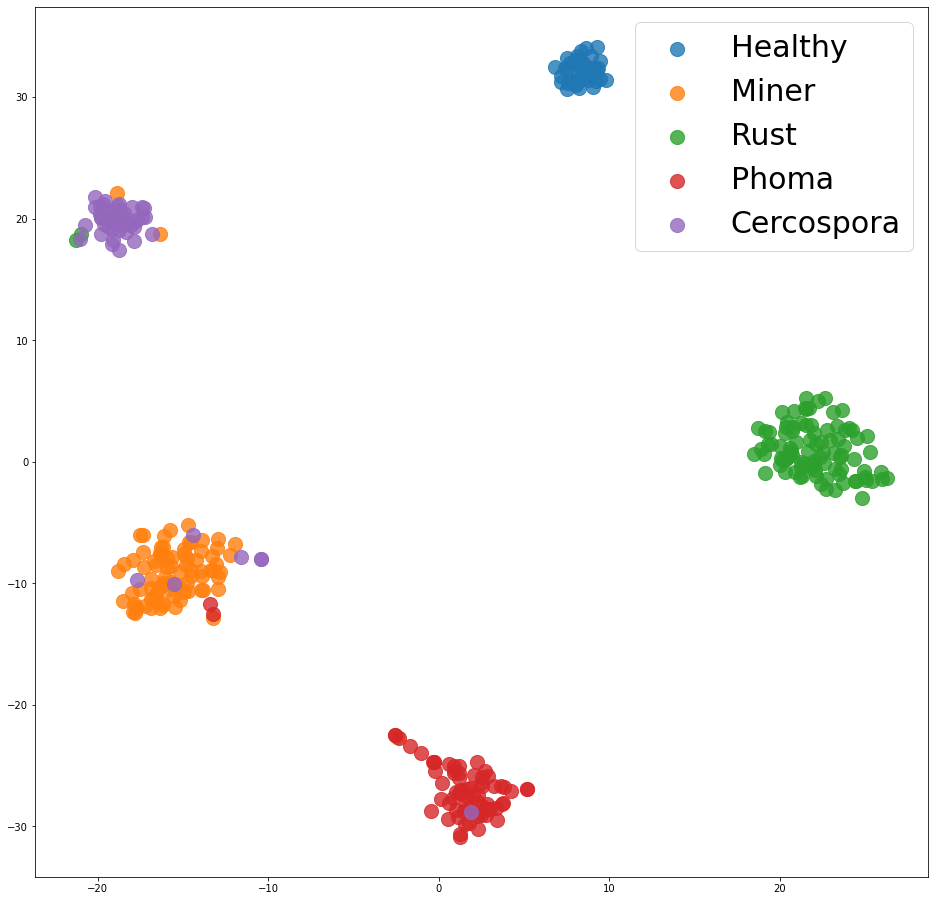

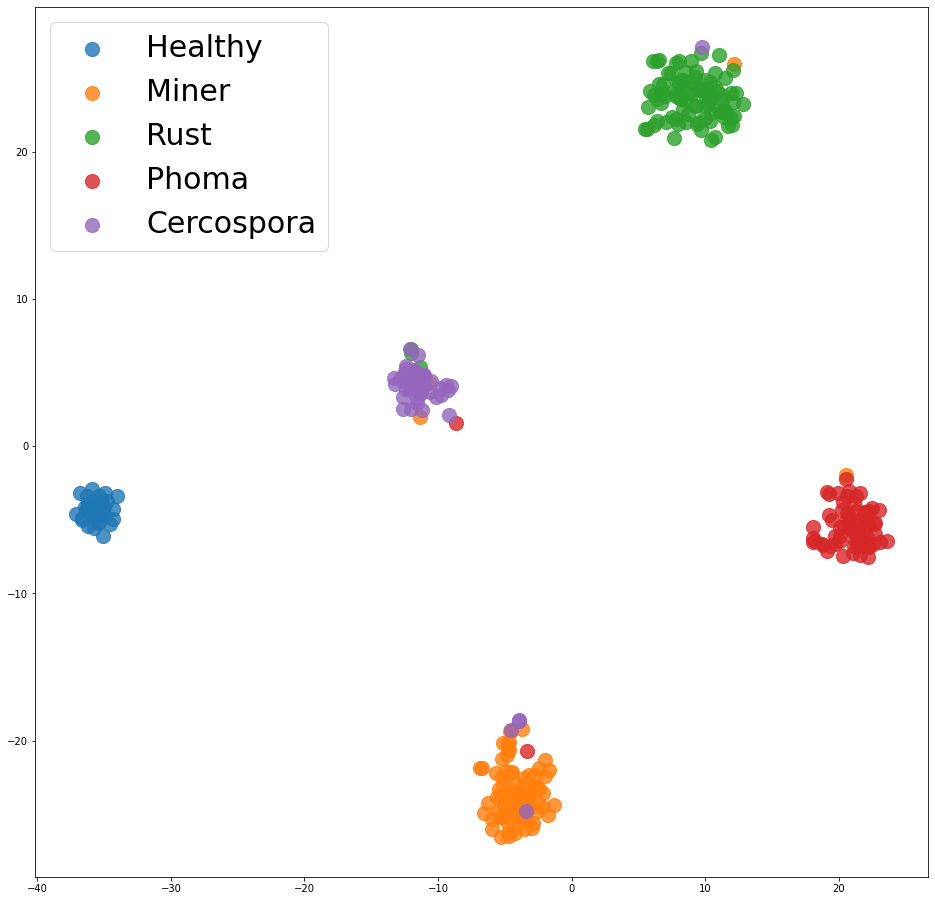

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/pg/protonet')
from run_protonet_models import generate_tSNE

generate_tSNE(ways=5, shot=5, path_data='/content/drive/MyDrive/pg/dataset/')
